## Name Lakshman Chaudhary

### PROJECT TITLE: Online Payment Fraud Detection Using Machine Learning

PROJECT DEFINITION: Fraud detection is defined as a process that detects scams and prevents fraudsters from obtaining money or property through false means. Fraud is a serious business risk that needs to be identified and mitigated in time.

PROBLEM STATEMENT: The aim of this project is to predict online payment fraud.



In [1]:
# import the necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set - ONLNE PAYMENT FRAUD DETECTION.CSV
Fraud_D = pd.read_csv('onlinefraud.csv')


In [22]:
print(Fraud_D.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [12]:
print(Fraud_D.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [11]:
print(Fraud_D.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [10]:
Fraud_D.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
print(Fraud_D.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
column_names = Fraud_D.columns
print(column_names)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


### The features in the dataset

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig:customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrg: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recepient before the transaction

newbalanceDest: the new balance of the receipient after the transaction

isFraud: fraud transaction

In [12]:
# Rename the column headers
Fraud_D.columns = ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
                   "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", 
                   "bal_of_receipient_after_transaction", "fraud_transaction", "flagged_fraud"]

# Verify the new column names
print(Fraud_D.columns)


Index(['step', 'type', 'amount', 'customer_starting_transaction',
       'bal_before_transaction', 'bal_after_transaction',
       'recipient_of_transaction', 'bal_of_recepient_before_transaction',
       'bal_of_receipient_after_transaction', 'fraud_transaction',
       'flagged_fraud'],
      dtype='object')


In [13]:
# View data (to give you first five rows)
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
# View data (to give you last five rows)
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,flagged_fraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [15]:
#Data Verification

Fraud_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   step                                 int64  
 1   type                                 object 
 2   amount                               float64
 3   customer_starting_transaction        object 
 4   bal_before_transaction               float64
 5   bal_after_transaction                float64
 6   recipient_of_transaction             object 
 7   bal_of_recepient_before_transaction  float64
 8   bal_of_receipient_after_transaction  float64
 9   fraud_transaction                    int64  
 10  flagged_fraud                        int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
# statistical analysis of the data

Fraud_D.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,flagged_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
Fraud_D.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [17]:
#Missing values

Fraud_D.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,flagged_fraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
Fraud_D.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

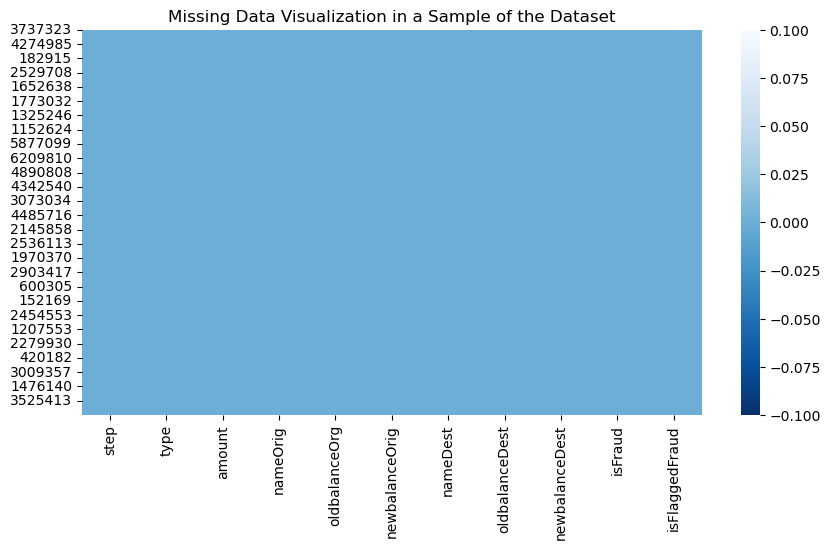

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Downsample the data for visualization (e.g., 10% of the data)
sampled_data = Fraud_D.sample(frac=0.1, random_state=42)

plt.figure(figsize=(10, 5))
plt.title("Missing Data Visualization in a Sample of the Dataset")
sns.heatmap(sampled_data.isnull(), cbar=True, cmap="Blues_r")
plt.show()


In [25]:
missing_summary = Fraud_D.isnull().sum()
print(missing_summary[missing_summary > 0])


Series([], dtype: int64)


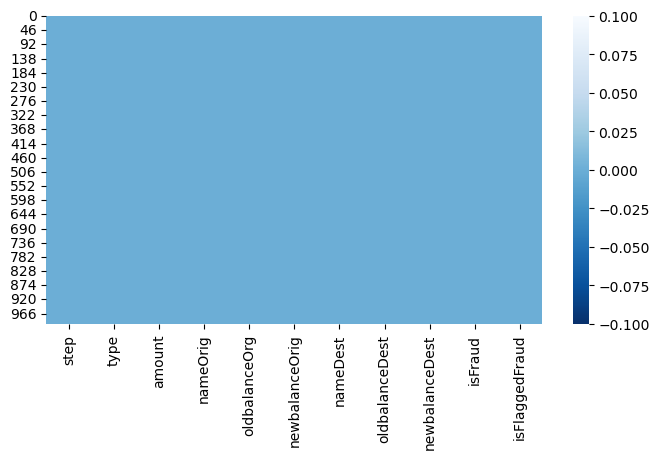

In [27]:
plt.figure(figsize=(8, 4))
sns.heatmap(Fraud_D.head(1000).isnull(), cbar=True, cmap="Blues_r")
plt.show()


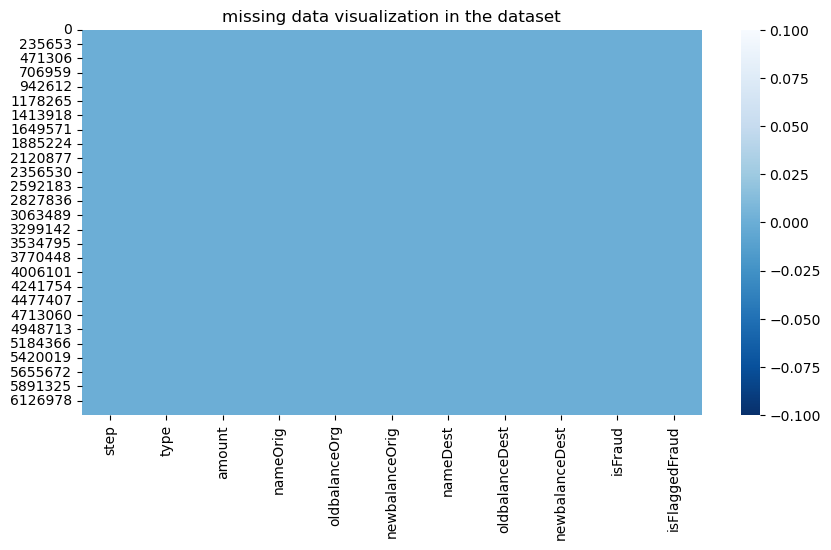

In [3]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")
plt.show()

### There is no missing values in the dataset

In [4]:
#check shape of the entire dataframe using .shape attribute
Fraud_D.shape

(6362620, 11)

### We have 6,362,620 rows and 11 columns in the dataset

### EXPLORATORY DATA ANALYSIS

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Correlation


Text(0, 0.5, 'count of online transaction type ')

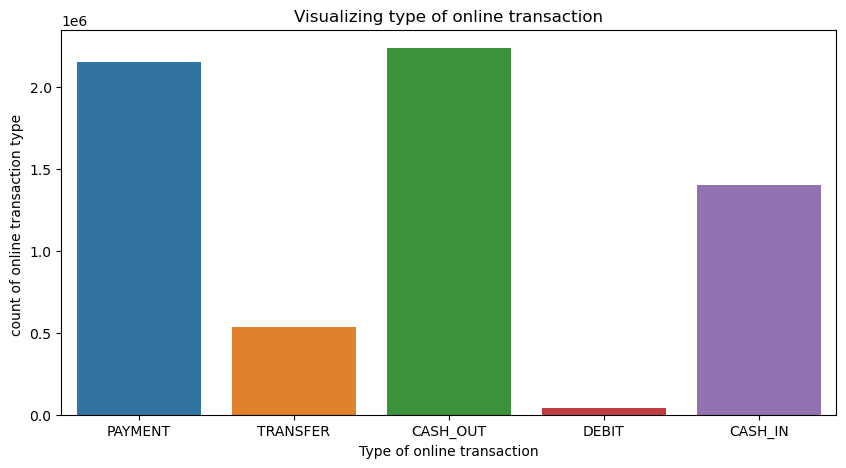

In [6]:
# Univariate Analysis
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

#### From the chart, it is seen that cash_out and payment  is the most common type of online transaction that customers use 

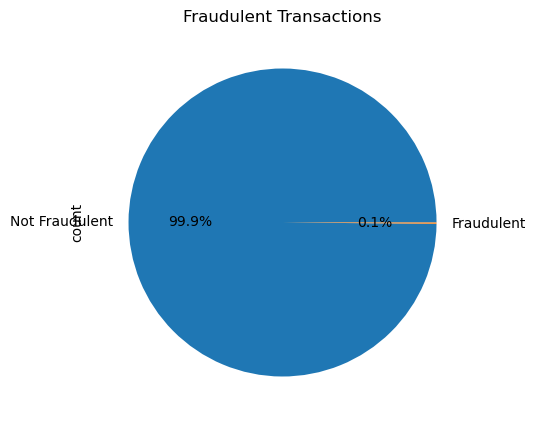

In [15]:
# Define function to label transactions as Fraudulent or Not Fraudulent
def Fraud(x):
    if x == 1:
        return "Fraudulent"
    else:
        return "Not Fraudulent"

# Apply the function to create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["isFraud"].apply(Fraud)

# Create visualization
plt.figure(figsize=(10, 5))
plt.title("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


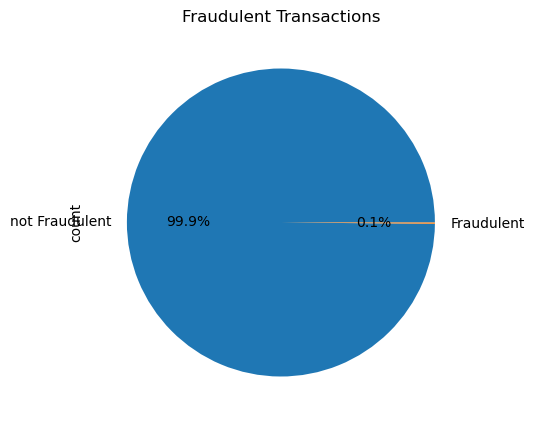

In [27]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["isFraud"].apply(Fraud)

# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#### From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balance

In [20]:
Fraud_D.fraud_transaction_label.value_counts()

fraud_transaction_label
not Fraudulent    6354407
Fraudulent           8213
Name: count, dtype: int64

In [23]:
8213/6354407*100

0.129248881917699

#### 8,213 transactions have been tagged as fraudulent in the dataset, which is approximately 13% of the total number of transactions.

<Axes: xlabel='step', ylabel='Density'>

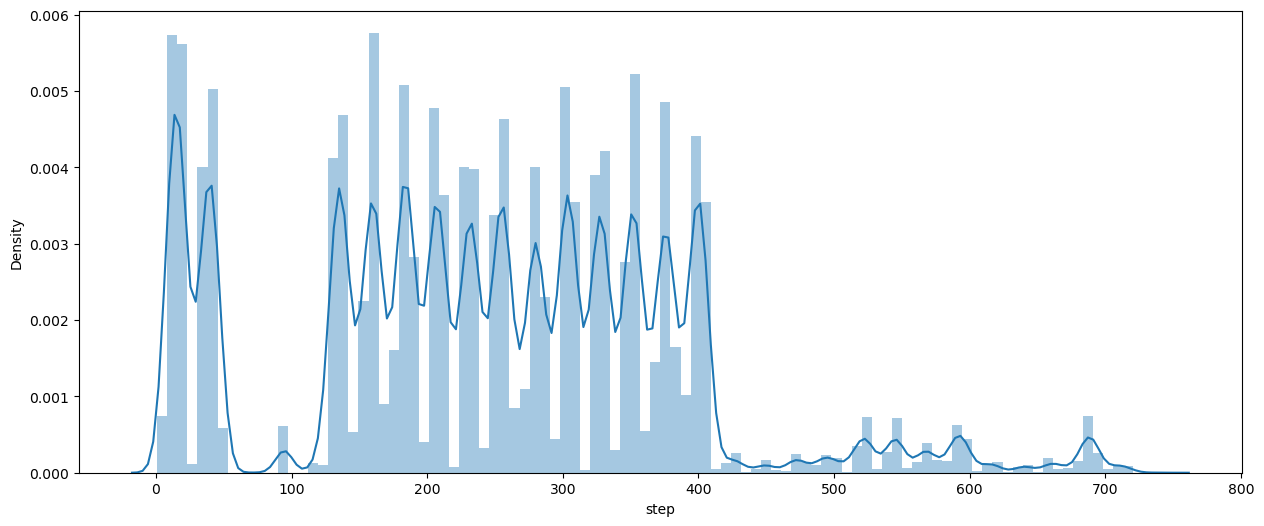

In [26]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(Fraud_D['step'],bins=100)

#### The above graph indicates the distribution of the step column

<Axes: xlabel='amount', ylabel='Count'>

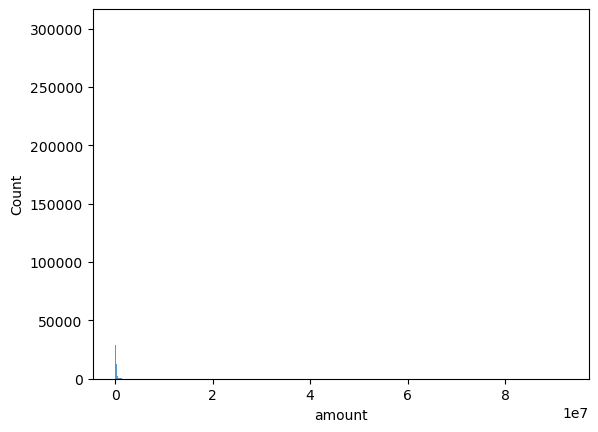

In [28]:
# Visualization for amount column

sns.histplot(x= "amount", data =Fraud_D)


In [29]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,not Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,not Fraudulent


In [35]:
Fraud_D.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,Fraudulent
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,Fraudulent
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,Fraudulent
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,Fraudulent
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,Fraudulent


<Axes: xlabel='type', ylabel='amount'>

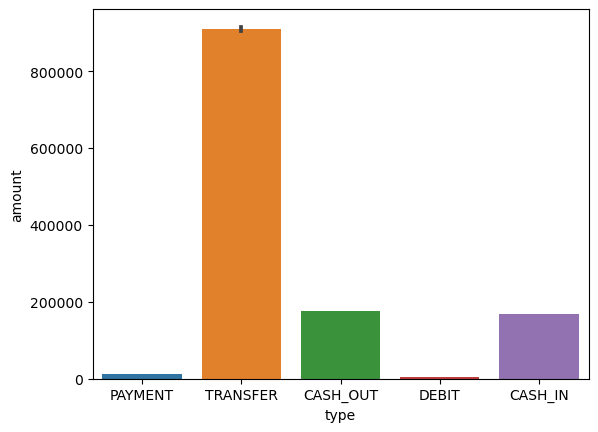

In [4]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=Fraud_D)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='amount', data=Fraud_D, estimator=sum)  # Or use estimator=mean for average amount
plt.title("Transaction Amount by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.show()


#### In this chart,  'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


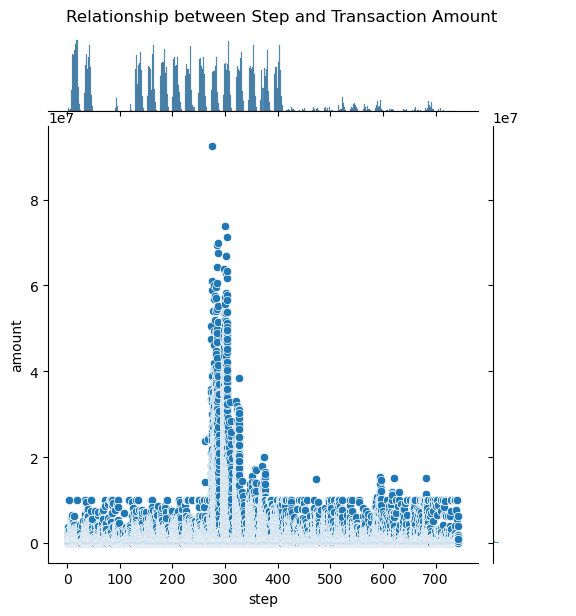

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace infinite values with NaN in the DataFrame
Fraud_D.replace([np.inf, -np.inf], np.nan, inplace=True)

# Re-plot with jointplot
sns.jointplot(x='step', y='amount', data=Fraud_D)
plt.suptitle("Relationship between Step and Transaction Amount", y=1.02)
plt.show()


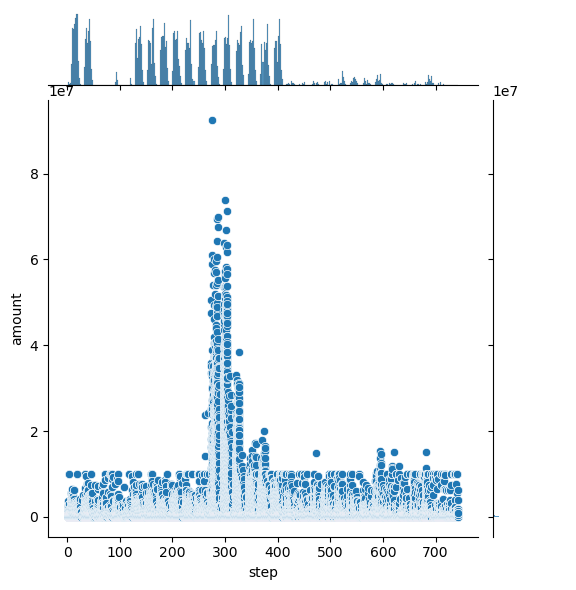

In [4]:
# Visualization between step and amount

sns.jointplot(x='step',y='amount',data=Fraud_D)

<Axes: xlabel='amount', ylabel='step'>

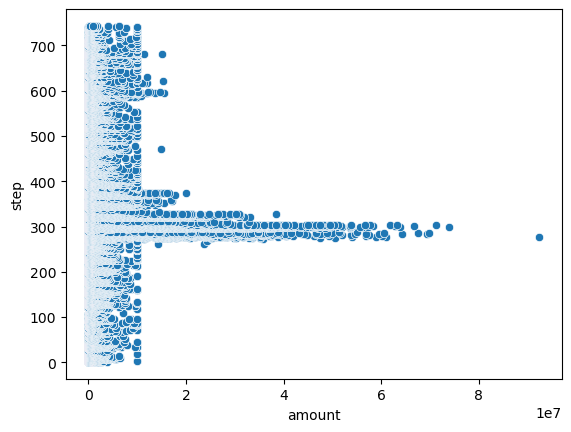

In [5]:
sns.scatterplot(x=Fraud_D["amount"], y=Fraud_D["step"])

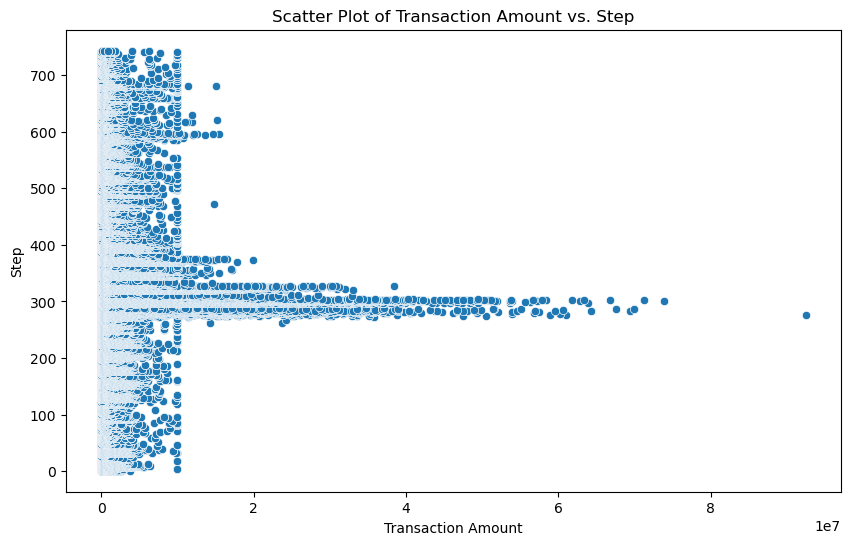

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'amount' vs. 'step'
plt.figure(figsize=(10, 6))
sns.scatterplot(x="amount", y="step", data=Fraud_D)
plt.title("Scatter Plot of Transaction Amount vs. Step")
plt.xlabel("Transaction Amount")
plt.ylabel("Step")
plt.show()


In [13]:
# Define labeling function
def Fraud(x):
    return "Fraudulent" if x == 1 else "Not Fraudulent"

# Apply function to create the label column
Fraud_D["fraud_transaction_label"] = Fraud_D["isFraud"].apply(Fraud)


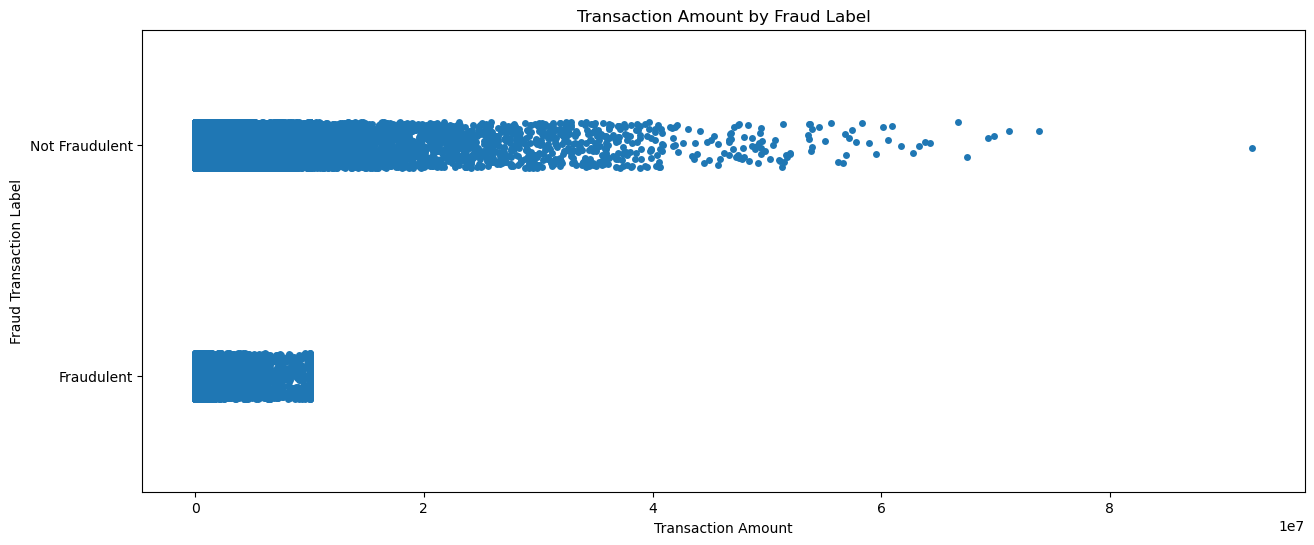

In [14]:
plt.figure(figsize=(15, 6))
sns.stripplot(x="amount", y="fraud_transaction_label", data=Fraud_D, jitter=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud Transaction Label")
plt.title("Transaction Amount by Fraud Label")
plt.show()


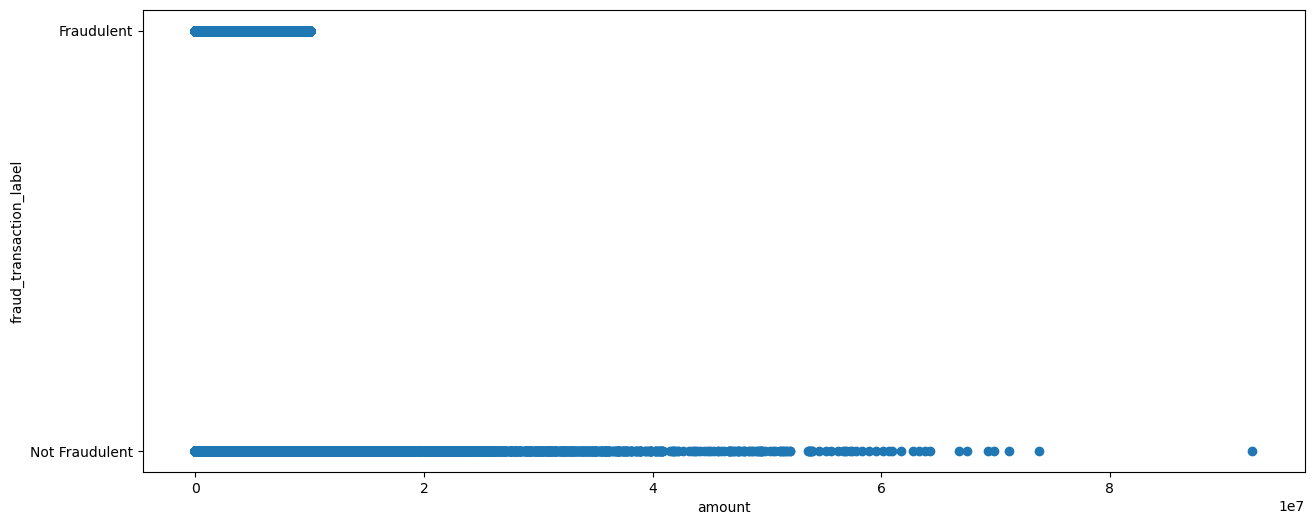

In [16]:
# Visualization between amount and fraud_transaction_label

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')
plt.show()

#### Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 10,000,000 amount.

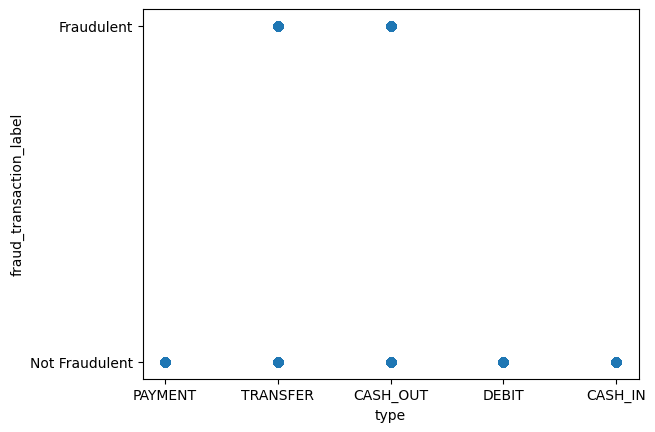

In [18]:
# Visualization between type and isfraud_label

plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')
plt.show()

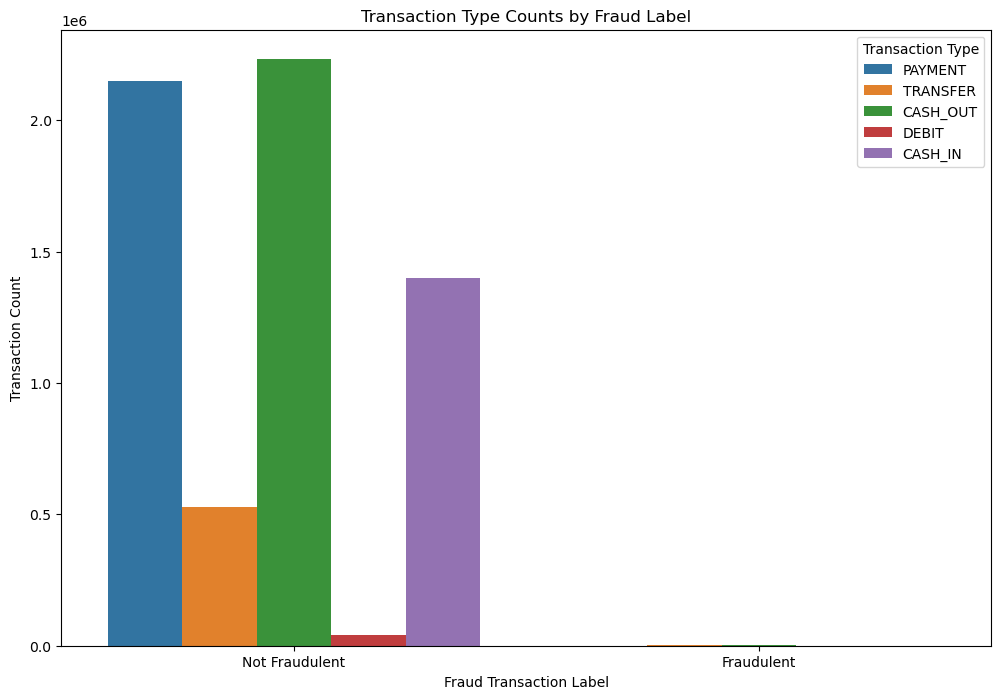

In [19]:
# Ensure fraud_transaction_label exists
def Fraud(x):
    return "Fraudulent" if x == 1 else "Not Fraudulent"

Fraud_D["fraud_transaction_label"] = Fraud_D["isFraud"].apply(Fraud)

# Plot the count of transaction types by fraud label
plt.figure(figsize=(12, 8))
sns.countplot(x='fraud_transaction_label', data=Fraud_D, hue='type')
plt.xlabel("Fraud Transaction Label")
plt.ylabel("Transaction Count")
plt.title("Transaction Type Counts by Fraud Label")
plt.legend(title='Transaction Type', loc='upper right')
plt.show()


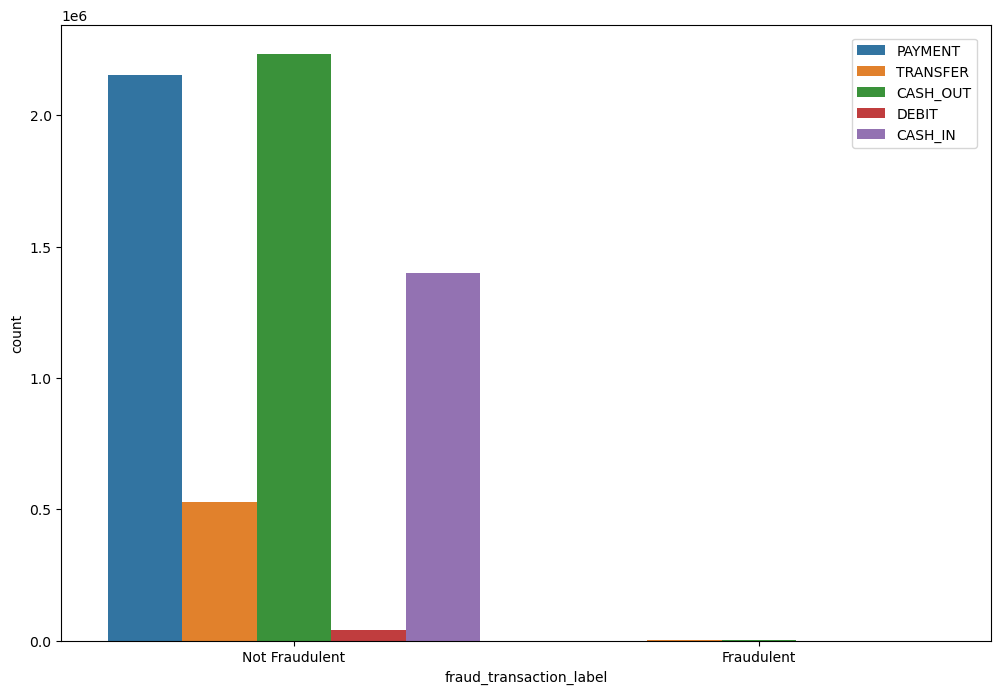

In [20]:
# Visualization between type and isfraud_label

plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

#### Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions

## Multivariate Analysis

<Axes: xlabel='type', ylabel='step'>

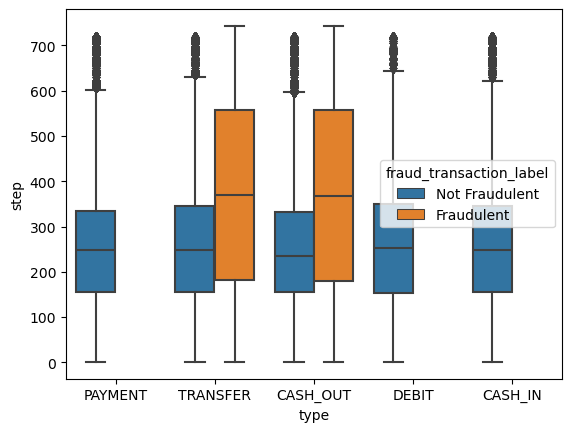

In [21]:
# Visualizing btw step,type and isFraud_label

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= Fraud_D)

### PERFORMING FEATURE ENGINERRING

Encoding categorical variables

In [ ]:
# One Hot Encoding
#1. select categorical variables

categorical = ['type']


In [31]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [32]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

#check what you have done
print(Fraud_D.shape)
Fraud_D.head()

(1048575, 16)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent,0,0,0,1,0


In [33]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once

Fraud_D.drop(categorical, axis = 1, inplace = True)

Fraud_D.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)


In [34]:
Fraud_D.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### Model Selection, Training and Validation

### Select Target


In [35]:
y = Fraud_D.fraud_transaction

### Selecting Features

In [36]:
X = Fraud_D.drop(['fraud_transaction'], axis = 1)

In [37]:
X

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


### Import ML algorithms and initialize them

In [38]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
## Train test split( training on 80% while testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [40]:
# Initialize each models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)


In [41]:
#create list of your model names
models = [LR,KN,DC,RF]

In [42]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)



For LogisticRegression, Accuracy score is 0.9989891042605441 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.57      0.36      0.45       233

    accuracy                           1.00    209715
   macro avg       0.78      0.68      0.72    209715
weighted avg       1.00      1.00      1.00    209715



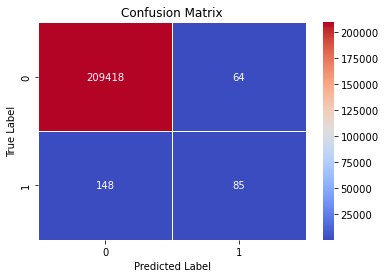


For KNeighborsClassifier, Accuracy score is 0.9993658059747753 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.83      0.54      0.65       233

    accuracy                           1.00    209715
   macro avg       0.91      0.77      0.83    209715
weighted avg       1.00      1.00      1.00    209715



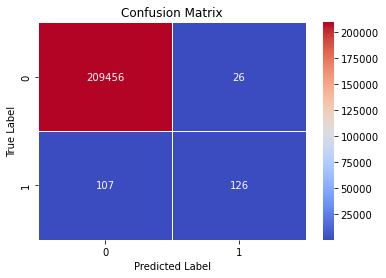


For DecisionTreeClassifier, Accuracy score is 0.9996042247812508 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.82      0.82      0.82       233

    accuracy                           1.00    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       1.00      1.00      1.00    209715



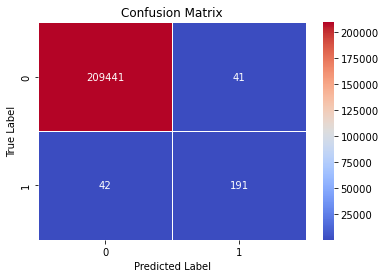


For RandomForestClassifier, Accuracy score is 0.9997806546980426 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.99      0.81      0.89       233

    accuracy                           1.00    209715
   macro avg       0.99      0.91      0.95    209715
weighted avg       1.00      1.00      1.00    209715



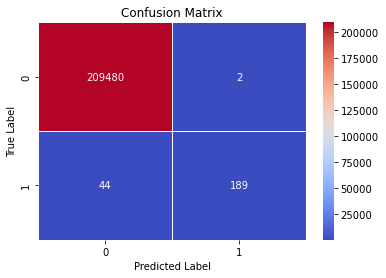

In [45]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

### Interpretation of the result

### The Decision Tree model with default parameters yields 99.96% accuracy on training data.

Precision Score: This means that 82% of all the things we predicted came true. that is 82% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 82% of it to be true.

### Random Forest Tree model with default parameters yields 99.97% accuracy on training data.
Precision Score: This means that 99% of all the things we predicted came true. that is 99% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 81% of it to be true.


##### Both the Decision Tree and Random Forest models outperform the Logistic Regression and K-Nearest Neighbors model by a wide margin. Since they both have similar recall scores, we should perform a cross-validation of the two models so we may declare which is the best performer with more certainty.


### Cross Validation

In [52]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
DC_scores = cross_validate(DC, X_test, y_test, scoring='recall_macro')
RF_scores = cross_validate(RF, X_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.8645167523613637
Random Forest Recall Cross-Validation: 0.8733484545132477


#### Conclusion
Upon training and evaluating our classification model, we found that the Random Forest model performed the best by a narrow margin.

Therefore, Random Forest performs best with recall cross-validation accuracy of 87% which is important for our problem statement where false negative is our priority


### Recommendation

Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer

Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.

Make customers to change PIN or password often

Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks

Increased cybersecurity for banking websites and mobile applications

Two factor authentication for transaction

Ensure that bank hire a data engineer that will ensure the dataset is accurate, balanced for proper EDA as there are too many outliers in this data set. This will enable the business to build machime learning models that predict outcomes more accurately with better performance.